# csv to GeoDataFrame

https://carmengg.github.io/eds-220-book/lectures/lesson-12-csv-to-geo.html

## About our data

Dataset 1: 
from energy information administration: info about current operable electroninc power plants 

Dataset 2: 
TIGER shapefiles depicting US state boundaries

In [1]:
# import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max.columns',None)

In [2]:
# We want to make geopandas geodataframe from csv data

# import csv
power_plants = pd.read_csv('data/power_plants_epsg4269.csv')

From the documentation we know the crs is epsg4269. We can use this information to create a new geopandas geodata frame from the pandas dataframe.

We use the `gpd.points_from_xy` function.

In [3]:
power_plants = gpd.GeoDataFrame(power_plants, #data
                                # specify geometry column 
                                geometry = gpd.points_from_xy(power_plants.longitude,
                                                             power_plants.latitude),   
                                # crs
                                crs='EPSG:4269'
                               )

Let's check info about CRS

In [4]:
print('is geographic?', power_plants.crs.is_geographic)
print('is projected?', power_plants.crs.is_projected)
print('datum: ', power_plants.crs.datum)
print('ellipsoid: ', power_plants.crs.ellipsoid)

is geographic? True
is projected? False
datum:  North American Datum 1983
ellipsoid:  GRS 1980


What's a geographic CRS? Whole globe, then you need to choose a projection.

In class activity

https://docs.google.com/document/d/1MSs7yqjr5APyBu5FNcPlPR5-NHirG2UseULlVhqSYsg/edit?usp=sharing

## Explore TIGER data
1. Import data as states
2. Simplify column names
3. What are the datatypes of the columns?
4. Update the datatypes of region, division and statefp to be int
5. Check the states dataframe CRS
6. Is it projected?
7. Plot
8. What is causing the extensive plotting?
9. Explore the statefp column values Find the regions in the dataset that are not US states

In [5]:
# 1: Import data as states
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [6]:
# 2: Simplify column names
# clean column names: make all lower case
states.columns = states.columns.str.lower()

In [7]:
# 3: What are the datatypes of the columns?
states.dtypes

region        object
division      object
statefp       object
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [8]:
# 4: Update the datatypes of region, division and statefp to be int
states.region = states.region.astype('int64')
states.division = states.division.astype('int64')
states.statefp = states.statefp.astype('int64')

states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [9]:
# 5: Check the states dataframe CRS

print('is geographic?', states.crs.is_geographic)
print('is projected?', states.crs.is_projected)
print('datum: ', states.crs.datum)
print('ellipsoid: ', states.crs.ellipsoid)

is geographic? True
is projected? False
datum:  North American Datum 1983
ellipsoid:  GRS 1980


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


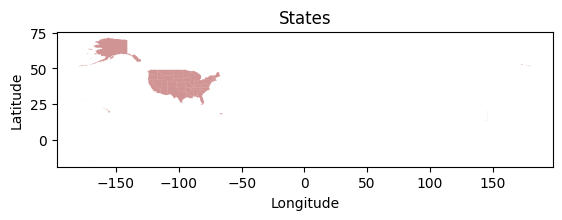

In [10]:
# 7: Plot
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
states.plot(ax=ax,
                 alpha=0.5,
                 color='brown'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('States') # need to set title this way, not in above .plot()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

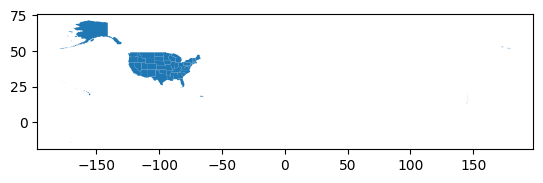

In [11]:
states.plot()

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

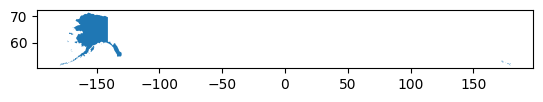

In [12]:
# 8: What is causing the extensive plotting?
# Is is alaska??
states[states.statefp==2].plot()

In [13]:
# 9: Explore the statefp column values Find the regions in the dataset that are not US states

In [15]:
 # notice region, division, and statefp are strings (object) types
 states.dtypes

# update dtypes of code columns
states.region = states.region.astype('int')
states.division = states.division.astype('int')
states.statefp = states.statefp.astype('int')

#States corresponds to regions 1 through 4. However, there’s also a region code 9. These rows correspond to non-state regions:

print(states.region.unique())
states[states.region==9]

[3 2 1 4 9]


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
34,9,0,78,01802710,78,VI,United States Virgin Islands,00,G4000,A,348021909,1550236187,+18.3392359,-064.9500433,"MULTIPOLYGON (((-64.76834 18.26033, -64.77074 ..."
35,9,0,69,01779809,69,MP,Commonwealth of the Northern Mariana Islands,00,G4000,A,472292521,4644252458,+15.0010865,+145.6181702,"MULTIPOLYGON (((145.05897 14.12500, 145.06302 ..."
36,9,0,66,01802705,66,GU,Guam,00,G4000,A,543555849,934337453,+13.4417451,+144.7719021,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
41,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-170.53809 -14.33613, -170.548..."
49,9,0,72,01779808,72,PR,Puerto Rico,00,G4000,A,8869029522,4922249087,+18.2176480,-066.4107992,"MULTIPOLYGON (((-66.32322 17.87767, -66.33170 ..."


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

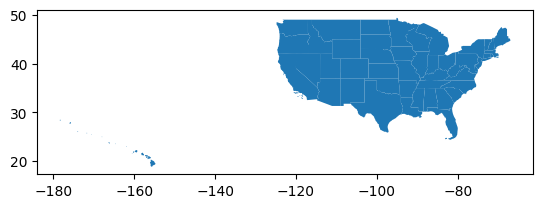

In [16]:
# plot data in states that is not Alaska (code 2) and doesn't have region code 9
states[(states.statefp!=2) & (states.region!=9)].plot()

In [17]:
# For the pupose of this exercise, we want to keep only data for the contiguous states. Let’s overwrite the geo-dataframes accordingly:

states = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico','Hawaii','Alaska'])]

In [18]:
#Before we plot our data, let’s make sure they are in the same CRS:

states.crs == power_plants.crs

True

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


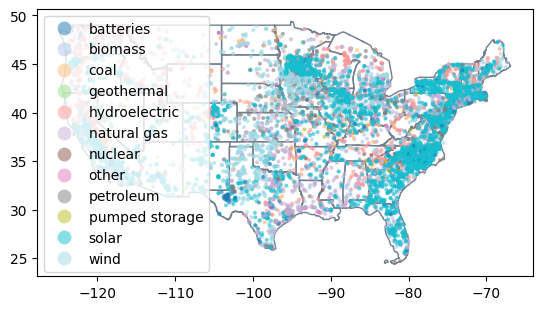

In [19]:
fig, ax = plt.subplots()

# add states 
states.plot(ax=ax,
            color='none',
            edgecolor = 'slategray')

# add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource', # color points according to primsource value
                  legend=True,    # add legend
                  markersize = 4, # adjust point size
                  cmap='tab20', # this color map has 20 different colors
                  alpha=0.5)

plt.show()

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:title={'center':'Operable electric generating plants in the contiguous United States'}>

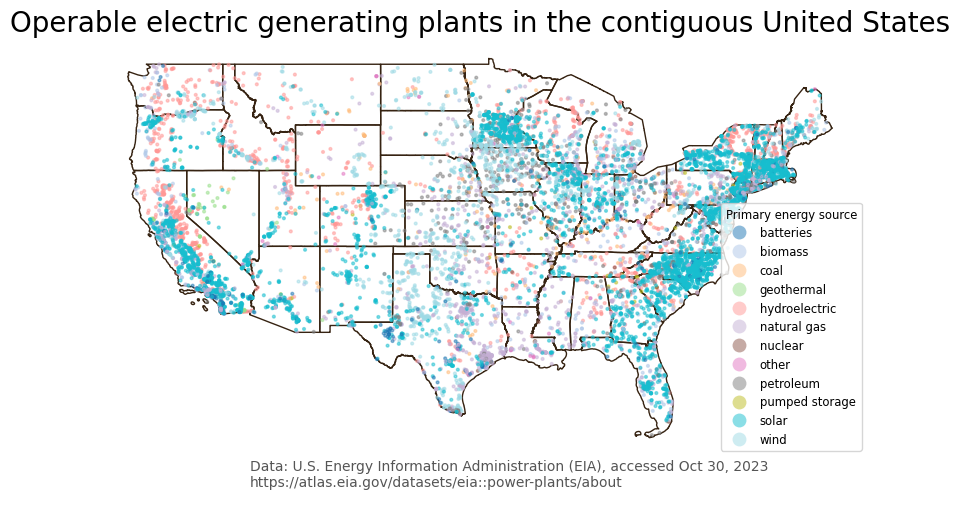

In [20]:
# figsize updates the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# --------------------------
# remove the axis box around the map
ax.axis('off')

# update title
ax.set_title('Operable electric generating plants in the contiguous United States',
fontsize=20)

# annotate the data source
ax.annotate("Data: U.S. Energy Information Administration (EIA), accessed Oct 30, 2023 \nhttps://atlas.eia.gov/datasets/eia::power-plants/about", 
            xy=(0.25, .06), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='#555555')

# --------------------------
# add states 
states.plot(ax=ax,
               color='none',
               edgecolor = '#362312')

# add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize = 4,
                  cmap='tab20',
                  alpha=0.5,
                  # adjust legend
                  legend_kwds={'loc': "lower right", 
                                'title':'Primary energy source',
                                'title_fontsize':'small', 
                                'fontsize':'small'})